In [96]:
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
import pylab as plt
import pandas as pd
import numpy as np


def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

def _savefig(fig,ax,name='',title='',fts=10,xsize=(30,35),zmax=None):
    plt.xticks(size=fts)
    plt.yticks(size=fts)
    plt.title(title)
    #mkdir(pathfig)
    fig.set_size_inches(xsize)
    #print(pathfig,name)
    fig.savefig(name + '.png')#,dpi='figure')
    fig.savefig(name + '.pdf', dpi=1000)
    plt.close()
    
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} r)".format(pct, absolute)


df_fr  = pd.read_csv('Reponses_FR.csv')
#df_eng = pd.read_csv('Reponse_ENG.csv')
df_eng = pd.read_excel('translate_FR.xlsx', header=1,encoding='latin1')
#print(df_eng)
df_eng = df_eng.set_axis(df.columns.values.tolist(),axis='columns')
#print(df_eng)
#df2    = pd.merge(df, df_eng)
#print(type(df),type(df_eng))

#frames = [df, df_eng]
#df     = pd.concat(frames)
df = df_fr.append(df_eng, ignore_index=True, sort=False)
print(df)


                     Horodateur  \
0   2021/03/25 3:46:39 PM UTC+2   
1   2021/03/25 3:48:09 PM UTC+2   
2   2021/03/25 3:48:42 PM UTC+2   
3   2021/03/25 3:49:18 PM UTC+2   
4   2021/03/25 3:49:24 PM UTC+2   
..                          ...   
93  2021/03/30 1:59:13 PM UTC+2   
94  2021/04/01 1:36:19 PM UTC+2   
95  2021/04/01 1:53:37 PM UTC+2   
96  2021/04/01 2:27:23 PM UTC+2   
97  2021/04/07 9:59:51 AM UTC+2   

                          Quel est votre profession ?  \
0   Recherche et Enseignement (y compris doctorant...   
1   Support à la recherche (Ingénieur / Technicien...   
2   Support à la recherche (Ingénieur / Technicien...   
3   Recherche et Enseignement (y compris doctorant...   
4   Recherche et Enseignement (y compris doctorant...   
..                                                ...   
93  Recherche et Enseignement (y compris doctorant...   
94  Recherche et Enseignement (y compris doctorant...   
95  Recherche et Enseignement (y compris doctorant...   
96  Suppo

2
2
4
2
2
4
2
2
2


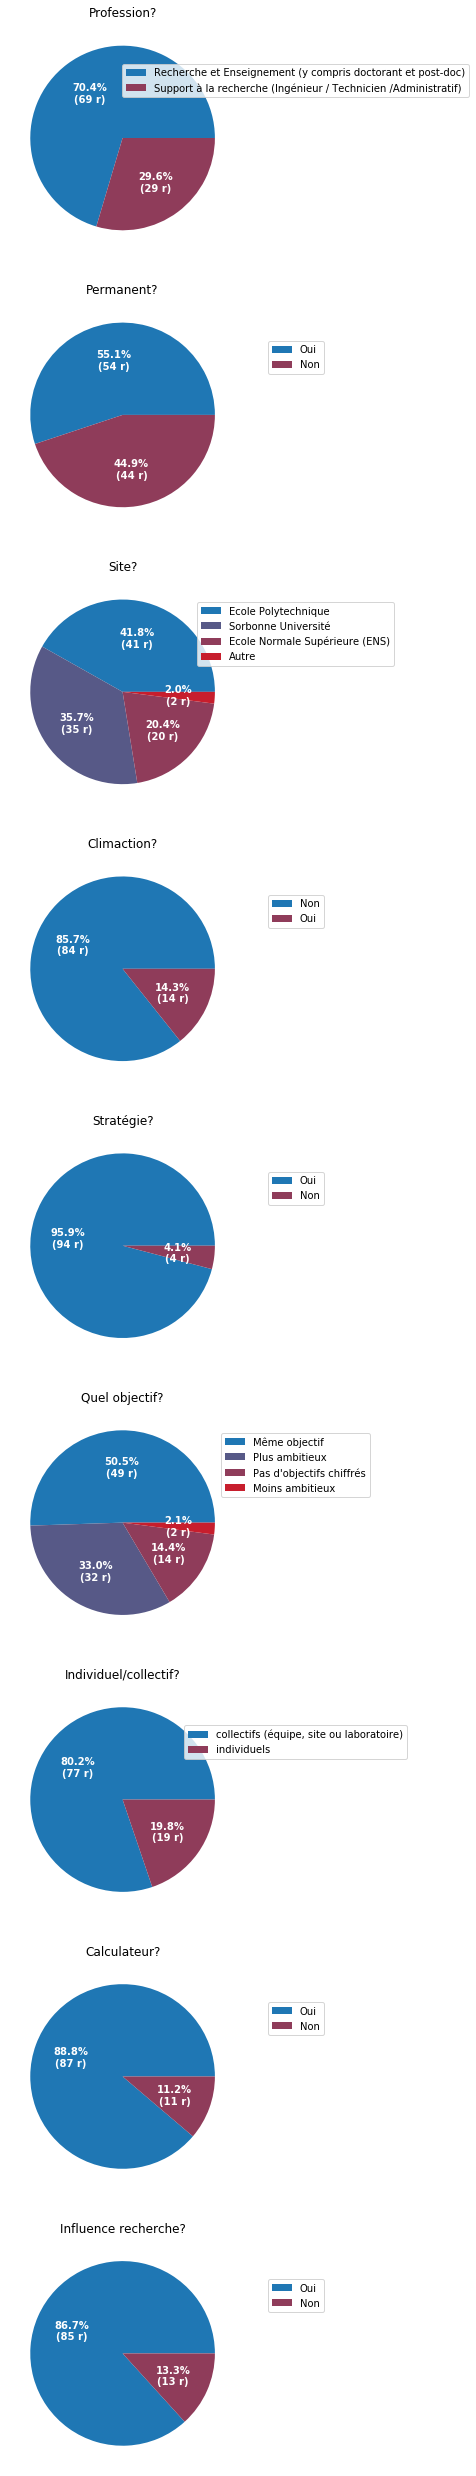

In [100]:



# Make a selection !!
# Subset
said_yes = df[df['Votre poste est-il permanent ?'] == 'Non']
#df       = said_yes

questions=df.columns.values

pies     = [1,2,3,4,5,6,8,17,18]
New_name = ['Profession?', 'Permanent?', 'Site?', 'Climaction?','Stratégie?','Quel objectif?',
            'Individuel/collectif?','Calculateur?','Influence recherche?']

figsize = (10, 45)
fig, ax = plt.subplots(len(pies),figsize=figsize, subplot_kw=dict(aspect="equal"))

colors2 = ['red', 'blue']
a       = np.random.random(4)
cs      = cm.Set1(np.arange(4)/4.)

c1='#1f77b4' #blue
c2='red' #green
n=4
#cs=[]
#for x in range(n):
colors2 = [colorFader(c1,c2,x/2)for x in range(2)]
colors4 = [colorFader(c1,c2,x/4)for x in range(4)]
#print(cs)

#colors4 = ['red', 'blue']

for ij,nbpie in enumerate(pies): #range(nbpies):
    data = df[questions[nbpie]].value_counts()#normalize=True)
    color = colors2
    print(len(data.unique()))
    if (len(data.unique())==4):
        color = colors4 
    wedges, texts, autotexts = ax[ij].pie(data, autopct=lambda pct: func(pct, data)\
                                          ,textprops=dict(color="w"), colors=color,startangle=0)
    
    ax[ij].legend(wedges, data.index,
          loc="center",
          bbox_to_anchor=(1, 1, 0.5, -0.5))
          #title=questions[1],
    plt.setp(autotexts, size=10, weight="bold")
    ax[ij].set_title(New_name[ij]) #questions[ij+1])

#plt.savefig('test.png')#, bbox_inches='tight')
pathfig='.'
plt.show()
_savefig(fig,ax,title='test',name='test',xsize=figsize)




Nb réponses :  98


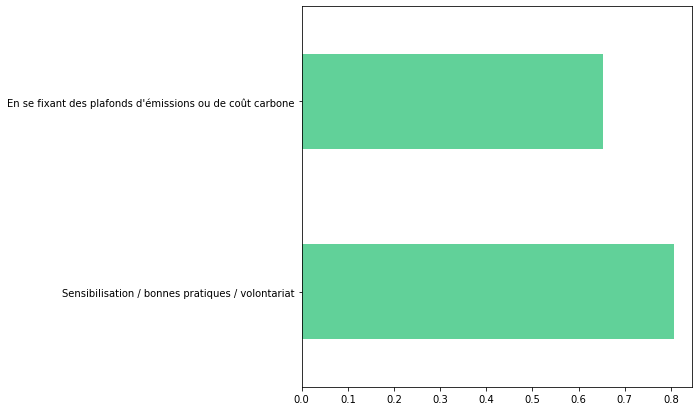

In [12]:
pies     = [7]
new_df = df[questions[pies[0]]].str.split(';', expand=True)
nb     = new_df.shape
print('Nb réponses : ',new_df.shape[0])

action = new_df.stack().value_counts()/new_df.shape[0]

action[:2].plot(kind='barh', figsize=(7,7), color="#61d199")
plt.show()


In [13]:
print(df[questions[10]].str.contains('Missions').value_counts())
print(df[questions[10]].str.contains('Campagnes').value_counts())
print(df[questions[10]].str.contains('Calcul').value_counts())
print(df[questions[10]].str.contains('Achats').value_counts())
print(df[questions[10]].str.contains('Déplacements').value_counts())
print(df[questions[10]])

True     74
False    23
Name: Selon vous, quel(s) poste(s) sont les plus émetteurs au LMD ?, dtype: int64
False    64
True     33
Name: Selon vous, quel(s) poste(s) sont les plus émetteurs au LMD ?, dtype: int64
True     60
False    37
Name: Selon vous, quel(s) poste(s) sont les plus émetteurs au LMD ?, dtype: int64
False    84
True     13
Name: Selon vous, quel(s) poste(s) sont les plus émetteurs au LMD ?, dtype: int64
False    71
True     26
Name: Selon vous, quel(s) poste(s) sont les plus émetteurs au LMD ?, dtype: int64
0     Achats;Bâtiments/chauffage/climatisation;Dépla...
1     Missions (hors campagnes de terrain);Calcul et...
2     Missions (hors campagnes de terrain);Campagnes...
3     Missions (hors campagnes de terrain);Campagnes...
4     Missions (hors campagnes de terrain);Campagnes...
                            ...                        
93    Missions (hors campagnes de terrain);Calcul et...
94    Bâtiments/chauffage/climatisation;Déplacements...
95                  Ca

[[0.64705882 0.         0.14901961 1.        ]
 [0.99346405 0.74771242 0.43529412 1.        ]
 [0.71764706 0.87973856 0.45882353 1.        ]
 [0.         0.40784314 0.21568627 1.        ]]
{'Ne pas toucher': array([0.64705882, 0.        , 0.14901961, 1.        ]), "Plutôt pas d'accord": array([0.99346405, 0.74771242, 0.43529412, 1.        ]), "Plutôt d'accord": array([0.71764706, 0.87973856, 0.45882353, 1.        ]), 'Priorité': array([0.        , 0.40784314, 0.21568627, 1.        ])}


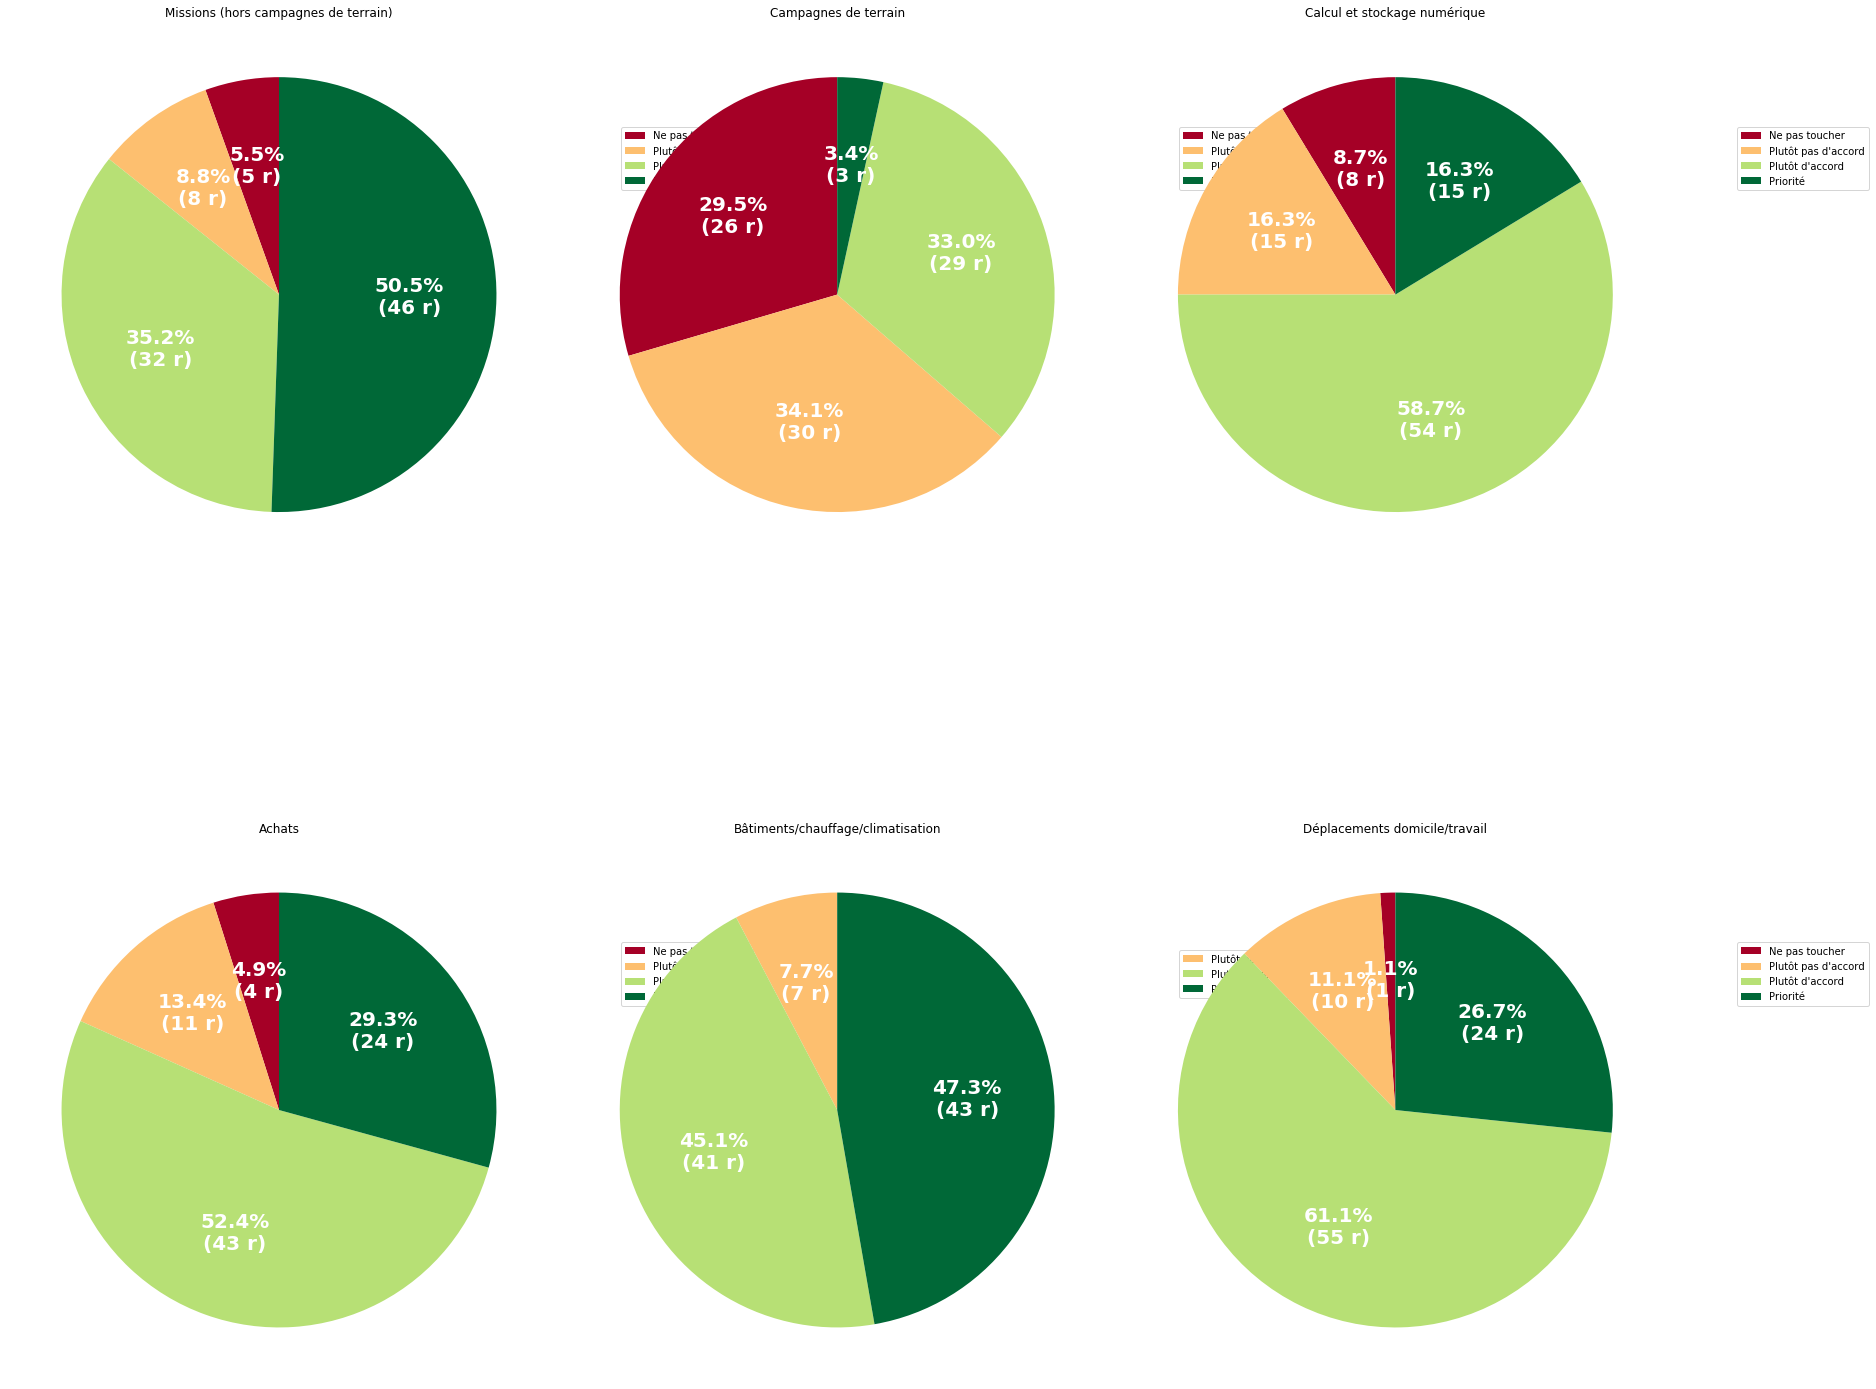

In [87]:
pies     = [11,12,13,14,15,16]

#fig, ax = plt.subplots(len(pies),figsize=(30, 35), subplot_kw=dict(aspect="equal"))
fig, ax = plt.subplots(2, 3, figsize=(30, 25))
fig.subplots_adjust(hspace = .5, wspace=.001)
ax = ax.ravel()

keys = ['Ne pas toucher','Plutôt pas d\'accord','Plutôt d\'accord','Priorité']
sizes=len(keys)

cmap = plt.cm.RdYlGn
colors = cmap(np.linspace(0., 1., sizes))
print(colors)


for ij,key in enumerate(keys):
    gcolors[key]=colors[ij]

#gcolors = {'Ne pas toucher': 'firebrick', 'Plutôt pas d\'accord': 'tomato'
#          ,'Plutôt d\'accord': 'lightgreen', 'Priorité': 'forestgreen'}
print(gcolors)

for ij,nbpie in enumerate(pies):    
    data = df[questions[nbpie]].value_counts()#.sort_index(key=lambda x: [x for x in gcolors.keys()])#normalize=True)

    name = data.name.split('[')[1][:-1]
    labels=[ij for ij in gcolors if ij in data.index]
    
    data = data.reindex(labels) #gcolors.keys())
    wedges, texts, autotexts = ax[ij].pie(data
                                          ,autopct=lambda pct: func(pct, data)
                                          ,colors=[gcolors[i] for i in data.index]
                                          ,textprops=dict(color="w"), startangle=90)
                                          #,wedgeprops={'alpha':0.8}) #,explode=(0, 0, 0.1, 0))
    #if ij==2:
    ax[ij].legend(wedges, data.index,
            loc="center",
            bbox_to_anchor=(1, 1, 0.5, -0.5))
    plt.setp(autotexts, size=20, weight="bold")
    ax[ij].set_title(name)

plt.show()

Missions (hors campagnes de terrain)    74
Bâtiments/chauffage/climatisation       61
Calcul et stockage numérique            60
Campagnes de terrain                    33
Déplacements domicile/travail           26
Achats                                  13
dtype: int64


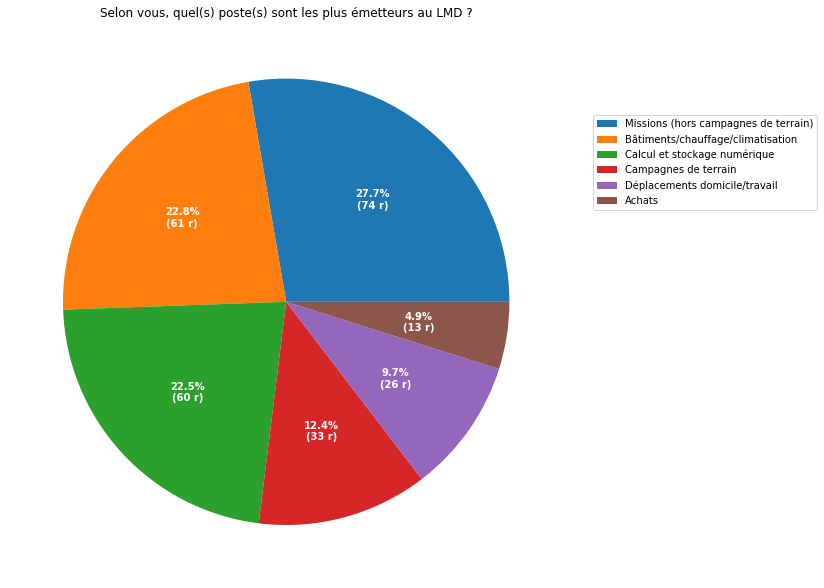

In [95]:

new_df=df[questions[10]].str.split(';', expand=True)
emission=new_df.stack().value_counts()

data = emission 
data = data[data>1]
print(data)
fig, ax = plt.subplots(1,figsize=(10, 15), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data)
                                  ,textprops=dict(color="w"), startangle=0)
ax.legend(wedges, data.index,
      loc="center",
      bbox_to_anchor=(1, 1, 0.5, -0.5))
      #title=questions[1],
plt.setp(autotexts, size=10, weight="bold")
ax.set_title(questions[10]) #questions[ij+1])

plt.show()